# Intent - 
is to explain in detail about the classification evaluation metrics
Any classification algorithm we apply, we need to measure how well did our model perform?



In [1]:
# imports
import sys,os
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\misc')
from misc.config import *
from IPython.display import Image


## confusion matrix
Most popular one is Confusion Matrix
As the name says, it is a 2d-array(matrix) 





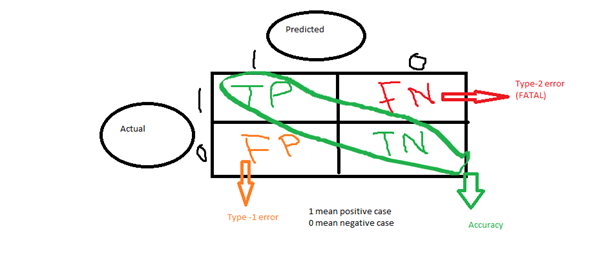

In [2]:
Image(filename=img_1)


## PS

The index written on the image are not according to standard array indexing. Please mind the difference

Further in the discussion, please refer this image for confusion matrix


# let us dig in

--------------------------------------------------------------------------------
The cells you have in greeen in diagonal contribute towards accuracy
Index(1,1) is called True Positive (TP) - actually positive(1) and identfied as positive(1)
cell with index(0,0) is called True Negative (TN) - actually negative(0) and identfied as negative(0)
Accuracy is defined as the no of positive or negative cases that your model was able to identify in all the cases that existsed

accuracy = ((TP +TN)/(TP+FN+FP+TN))*100

--------------------------------------------------------------------------------
The cell in orange with index(0,1) is called Type 1 error, Actually the observation was classfied as negative case but your model predicted as positive. This error is not very fatal
For e.g. The client wanted to see if customer is a loyal one or not? Given the prediction, client will keep that customer in special zone, but it wont give him any fruits for his effort..Still can be affordable

--------------------------------------------------------------------------------
The cell in red with index(1,0) is called Type-2 error, and is fatal. Actually that observation was positive case and your model predicted as negative.
For e.g. The client wanted to see if customer is a loyal one or not? Given the prediction, client will not pay any effort on turning this customer, keeping your prediction in mind. That's just 1 custome, you might think :)
But if your model predicted a large amount of observations as FN, then client is going to loose a considerable chunk of his loyal clients and would suffer a huge loss.
Another example, can be a model predicting cancer benign or malignant. For a patient who had cancer and you model predicted as healthy, that would be devastating

--------------------------------------------------------------------------------
P.S : Now you interpretation depends on what does 1 represent for you, it might be that he had cancer which was malignant or it could represent that it was benign, so interpret accordingly.


## Specificity and sensitivity
Specificty is the TPR/Recall is the proportion of TP(cell with index as 1,1) you model identified out of all the acually positive cases(first row in diagram above)
Recall/TPR = (TP)/(TP+FN)

Sensitivity is the TNR(cell 0,0) and is the proportion of actual negative cases(second row in daigram above) that model correctly classified.
Sensitivity/TNR = (TN)/(TN+FP)


# Recall and Precision
Recall is same as sensitivity(descibed above). It is the proportion of positive cases that your model identified correctly out of all the positive cases
Precision is the no of positive cases that model predicted correctly of all positive predictions

Still with me.....? See below



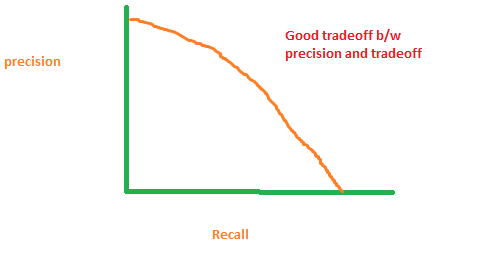

In [3]:
Image(filename=img_2)


## Precision-Recall curve
To measure performance in dataset with imbalanced target class, we rely on this metric a lot





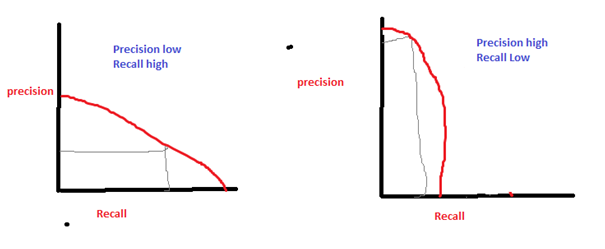

In [4]:
Image(filename=img_3)


## precision-recall in action

In [1]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
breast_cancer = load_breast_cancer()#load
data = pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)
data['cancer'] = breast_cancer.target
data['size'] = data['cancer'].apply(lambda x: breast_cancer.target_names[x])
data[data.cancer == 1].head(1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer,size
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,1,benign


In [134]:
# let us apply RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [106]:
iv = data.drop(['size','cancer'],axis=1)
dv = data['cancer'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)
model = SVC(probability=True).fit(iv_train, dv_train)

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [117]:
from sklearn.metrics import precision_recall_curve,f1_score,average_precision_score,auc,roc_curve,roc_auc_score,auc


In [40]:
data.cancer.value_counts()
#no of 0 is minority(malign cancer), so let see how well model does in classifying that

1    357
0    212
Name: cancer, dtype: int64

In [120]:
#need prob as the prediction instead of label for curves
dv_test_proba = model.predict_proba(iv_test)[::,1] #extract the prob of class cancer = 0 
prec, recall, threshold = precision_recall_curve(dv_test,dv_test_proba)


In [121]:
#get a single value for your precision recall curve
average_precision_score(dv_test,dv_test_proba)

0.9659200269770578

In [122]:
#this is almost same as average precision recall score above
auc_ = auc(recall,prec)
auc_

0.9697749197114749

In [123]:
#f1 score - harmonic mean of precision and recall(tradeoff)
dv_test_pred = model.predict(iv_test)
f1_score(dv_test,dv_test_pred)

0.8307692307692308

In [132]:
cm

col_0,1
row_0,
0,33
1,81


In [ ]:
#confirm from confusion metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
cm = confusion_matrix(dv_test,dv_test_pred)
cm = pd.crosstab(dv_test,dv_test_pred)
#precision
prec_ = cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[0,1])

#recall
recall_ = cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[1,0])

# f1 score
f1 = (2*prec_*recall_)/(prec_+recall_)


prec_,recall_,f1
#f1 score matches the above api result

## Plots

In [125]:
def plot_conf_matrix(cm, names, title = 'conf matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)#xticks 
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


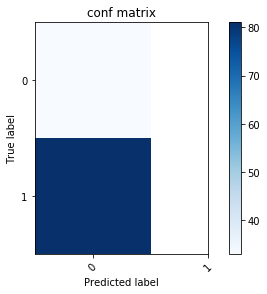

In [126]:
#way 1
plot_conf_matrix(cm,['0','1'])

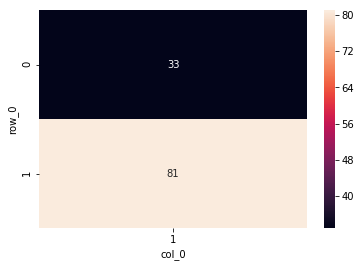

In [181]:
# way 2
sb.heatmap(cm,annot=True)

Text(0, 0.5, 'precision')

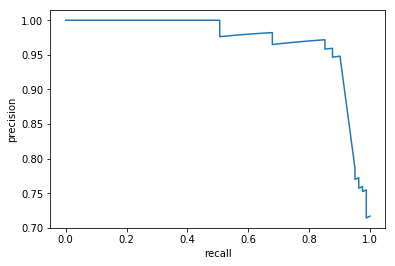

In [128]:
plt.plot(recall,prec)
plt.xlabel('recall')
plt.ylabel('precision')

## ROC curve

roc is receiver operating curve, and the area under the curev is called as auc
It is atradeoff between TPR and FPR




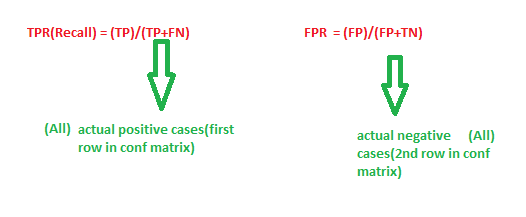

In [5]:
Image(filename=img_4)

## ROC curve in action

In [129]:
fpr,tpr,threshold = roc_curve(dv_test,dv_test_proba)
#way 1:
auc_ = roc_auc_score(dv_test,dv_test_proba)
auc_

0.9206883651328096

In [130]:
#way 2: 
auc(fpr,tpr)

0.9206883651328096

Text(0, 0.5, 'tpr')

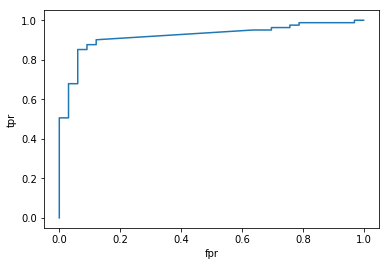

In [131]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [135]:
model = LogisticRegression(C=0.1)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [136]:
f1_score(dv_test,dv_test_pred)
#clearly logistic regression performs the best

0.9693251533742332

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D35CC71A90>,
      dtype=object)

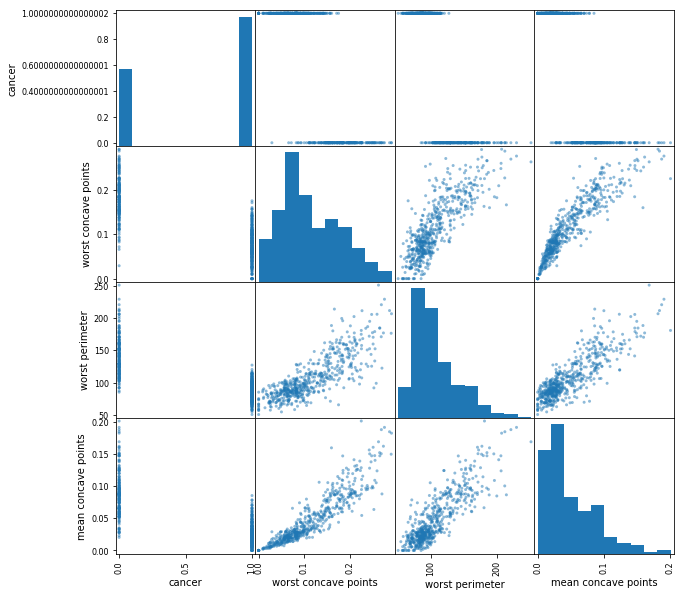

In [150]:
from pandas.plotting import scatter_matrix
cor = data.corr()
top_10 = abs(cor['cancer']).nlargest(4)
df = data[top_10.index.values]
scatter_matrix(df,figsize=(10,10))

# insight
here iv are highly correlated, and hence such a high score and vif >5 and is overfitting, so need to rethink about feature selection
SVM performed reasonably good, but the precision-recall score and auc was very poor
Can not try naive bayes since predictors are not independent

## Random forest

In [153]:
iv = data.drop(['size','cancer'],axis=1)
dv = data['cancer'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)
model = RandomForestClassifier().fit(iv_train, dv_train)
dv_test_pred = model.predict(iv_test)
f1_score(dv_test,dv_test_pred)

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9798657718120806

In [154]:
dv_test_proba = model.predict_proba(iv_test)[::,1] #extract the prob of class cancer = 0 
prec, recall, threshold = precision_recall_curve(dv_test,dv_test_proba)
auc(recall,prec)

0.9971390299207201

In [159]:
print(model.feature_importances_.sort())

None


In [167]:
iv_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [171]:
fimp = pd.DataFrame({'val':model.feature_importances_,'feature':iv_train.columns})

In [173]:
fimp.head()

,val,feature
0,0.020701,mean radius
1,0.002503,mean texture
2,0.079100,mean perimeter
3,0.009756,mean area
4,0.007231,mean smoothness


In [179]:
abs(cor['cancer']).sort_values(ascending=False).head(10)

cancer                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
Name: cancer, dtype: float64

# RF outperforms all the models
we can see RF derived info from less correlated featues(since the method is different and tree based ), and predicted the best

In [183]:
from sklearn.model_selection import KFold

In [186]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer,size
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


In [69]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LASSO

ImportError: cannot import name 'LASSO' from 'sklearn.linear_model' (C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [185]:
iv = data.drop(['cancer'],axis=1).values
dv=data['cancer']
for train_index,test_index in kf.split(range(data.shape[0])):
    iv_train = iv[train_index],iv[train_index]

<generator object _BaseKFold.split at 0x000001D35D700E58>

In [11]:
# multicollinearity with get_dummies
income=[39,44,32,42,23,40,30,45,35,25]
len(income)

10

In [58]:
dummy = pd.DataFrame({'income':[53,67,55,76,98,100,90,60,50],
            'age':[39,44,32,42,23,40,30,35,25],
            'sex':['f','m','m','m','f','f','m','m','f'],
            'overtime':['y','n','y','y','n','y','n','y','n']}
            )

In [19]:
def iv_dv_get_col_names(data,target):
    continous_names = []
    categ_names = []
    for i in data.columns:
        continous_names.append(i) if data.loc[:,i].dtypes in ['int64','int32','float32','float64'] \
        else categ_names.append(i)
    iv = data.loc[:,data.columns!=target]# data.drop(['y'],axis=1)
    dv = data.loc[:,target]
    iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2,random_state=42)
    return continous_names,categ_names, iv, dv,[iv_train, iv_test, dv_train,dv_test]

def iv_dv_get_col_names_dist_based(data,target):
    return iv_dv_get_col_names(data,target)

def plot_corr(data, target='', k = -1):
    """In case you need to plot k largest correlated features under target col passed use
    plot_corr(data[cont],'y',3); k =3 and target is 'y' here
    """
    cor = data.corr() if k == -1 else data.corr().nlargest(k,target)
    f,ax = plt.subplots(figsize=(7,7))
    return sb.heatmap(cor,annot=True,cmap="viridis")

In [59]:
#generate continous col names
cont,categ,iv,dv,testparam = iv_dv_get_col_names_dist_based(dummy,'income')

In [64]:
def categ_to_numeric(data,drop = False):
    dummy_data = pd.get_dummies(data[categ],drop_first = True) if drop else pd.get_dummies(data[categ])
    return dummy_data


In [60]:
dummy_data = pd.concat([dummy['income'] ,categ_to_numeric(dummy)],axis=1)

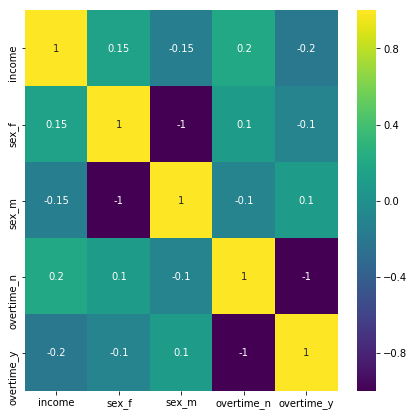

In [42]:
plot_corr(dummy_data)

In [30]:
def fitols(iv,dv,intercept = True):
    model = sm.OLS(dv,sm.add_constant(iv)).fit() if intercept else sm.OLS(dv,iv).fit()
    #An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.
    return model.summary()

In [50]:
fitols(iv,dv)

C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.257
Method:                 Least Squares   F-statistic:                    0.1819
Date:                Mon, 02 Sep 2019   Prob (F-statistic):              0.838
Time:                        13:47:54   Log-Likelihood:                -38.798
No. Observations:                   9   AIC:                             83.60
Df Residuals:                       6   BIC:                             84.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3864      3.722      9.776      0.000      27.279      45.493
sex_f         20.6705      7.851      2.633      0.039       1.459      39.882
sex_m         15.7159      7.490      2.098      0.081      -2.612      34.043
overtime_n    21.6705      7.851      2.760      0.033       2.459      40.882
overtime_y    14.7159      7.490      1.965      0.097      -3.612      33.043
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.575
Skew:                           0.040   Prob(JB):                        0.750
Kurtosis:                       1.765   Cond. No.                     3.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## observe
acc to p value, sex_m,overtime_y is insignificant

In [40]:
# such bad 
dummy_data

,sex_f,sex_m,overtime_n,overtime_y
0,1,0,0,1
1,0,1,1,0
2,0,1,0,1
3,0,1,0,1
4,1,0,1,0
5,1,0,0,1
6,0,1,1,0
7,0,1,0,1
8,1,0,1,0


In [52]:
#generate continous col names
cont,categ,iv,dv,testparam = iv_dv_get_col_names_dist_based(dummy_data,'income')
lm_model = LinearRegression().fit(iv,dv,drop_one_col=1)
dv_test = lm_model.predict(iv)
r2_score(dv,dv_test)

TypeError: fit() got an unexpected keyword argument 'drop_one_col'

In [65]:
dummy_data2 = pd.concat([dummy['income'] ,categ_to_numeric(dummy,drop = True)],axis=1)

In [66]:
dummy_data2

,income,sex_m,overtime_y
0,53,0,1
1,67,1,0
2,55,1,1
3,76,1,1
4,98,0,0
5,100,0,1
6,90,1,0
7,60,1,1
8,50,0,0


## we can also, manually drop col using vif mechanism